<a href="https://colab.research.google.com/github/Moooooonk/AI-from-basic/blob/main/20250311%EB%B6%93%EA%BD%83%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# 붓꽃 데이터셋 불러오기
iris = load_iris()

# 데이터프레임으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 타겟(품종) 추가
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 데이터 확인
print("데이터 샘플:")
print(iris_df.head())

# 기본 통계 확인
print("\n기본 통계:")
print(iris_df.describe())

# 각 품종별 개수 확인
print("\n품종별 개수:")
print(iris_df['species'].value_counts())

# 결측치 확인
print("\n결측치 확인:")
print(iris_df.isnull().sum())

데이터 샘플:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

기본 통계:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000     

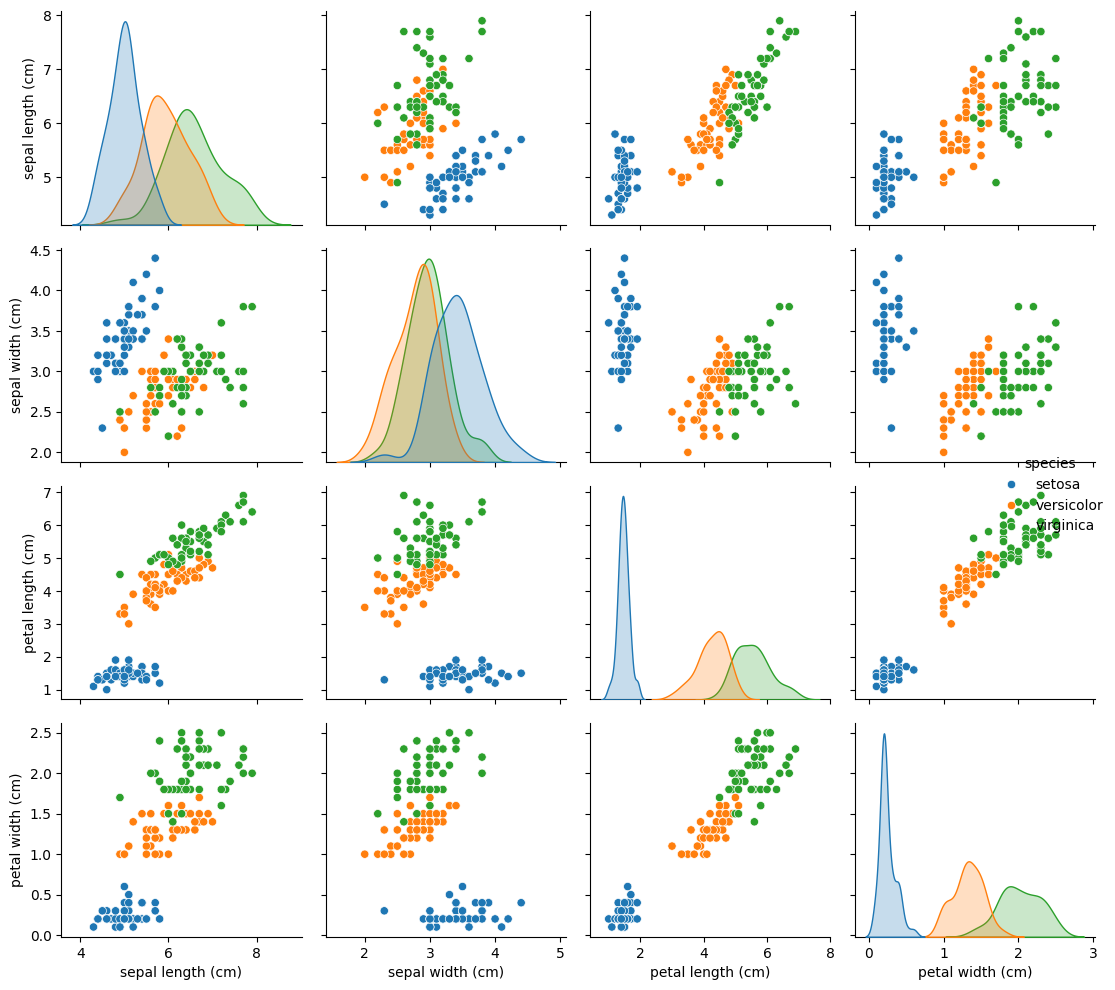

In [ ]:
# 산점도 행렬 (Scatter plot matrix)
sns.pairplot(iris_df, hue='species')
plt.tight_layout()
plt.show()


정확도: 1.0000


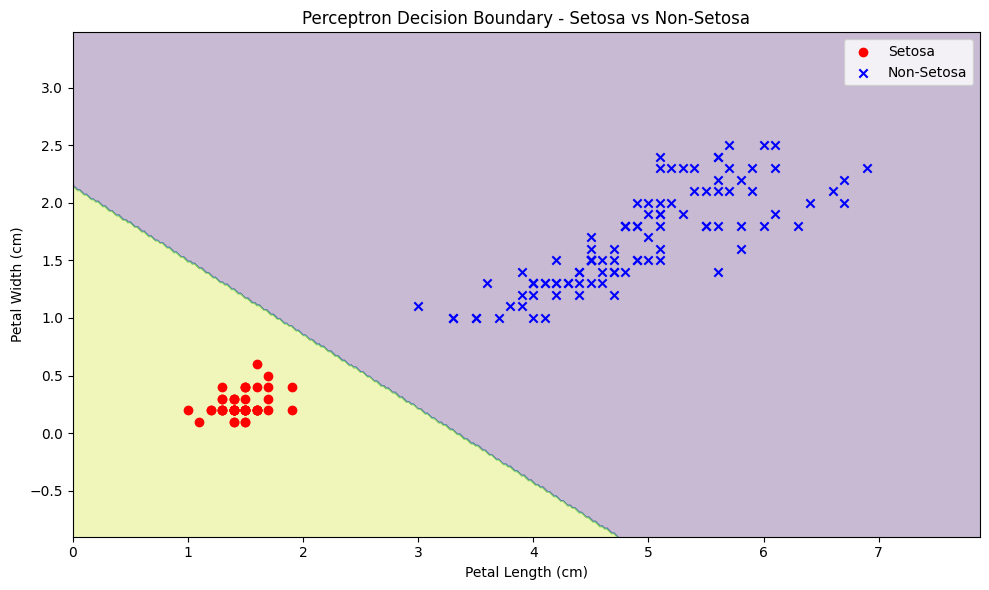

Weight coefficients: [[-1.8 -2.8]]
Bias (intercept): [6.]

결정 규칙:
Petal Length (w1) * -1.8000 + Petal Width (w2) * -2.8000 + 6.0000 > 0 이면 Setosa


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 붓꽃 데이터 불러오기
iris = load_iris()
X = iris.data[:, 2:4]  # 꽃잎(petal)의 길이와 너비만 선택 (2, 3번 특성)
y = np.where(iris.target == 0, 1, 0)  # Setosa이면 1, 아니면 0

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 퍼셉트론 모델 훈련
model = Perceptron(max_iter=100, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy:.4f}")

# 결정 경계 시각화
def plot_decision_boundary():
    # 결정 경계를 시각화하기 위한 메쉬 생성
    petal_length_min, petal_length_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    petal_width_min, petal_width_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(petal_length_min, petal_length_max, 0.02),
        np.arange(petal_width_min, petal_width_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 플롯
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)

    # 데이터 플롯
    setosa = iris.target == 0
    plt.scatter(X[setosa, 0], X[setosa, 1], c='red', marker='o', label='Setosa')
    plt.scatter(X[~setosa, 0], X[~setosa, 1], c='blue', marker='x', label='Non-Setosa')

    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Perceptron Decision Boundary - Setosa vs Non-Setosa')
    plt.legend()
    plt.tight_layout()
    plt.show()

# 결정 경계 시각화 함수 호출
plot_decision_boundary()

# 모델 계수 확인
print(f"Weight coefficients: {model.coef_}")
print(f"Bias (intercept): {model.intercept_}")

# 간단한 분류 규칙 출력
print("\n결정 규칙:")
print(f"Petal Length (w1) * {model.coef_[0][0]:.4f} + Petal Width (w2) * {model.coef_[0][1]:.4f} + {model.intercept_[0]:.4f} > 0 이면 Setosa")